In [35]:
!jt -t chesterish

In [36]:
'''
To change the theme use the following command:
!jt -t <theme-name>

Theme names: 
1) chesterish 
2) onedork  (currently using)
    !jt -t onedork -f roboto -fs 12
3) monokai
 more here: https://github.com/dunovank/jupyter-themes
 
 
 other: https://towardsdatascience.com/bringing-the-best-out-of-jupyter-notebooks-for-data-science-f0871519ca29
'''

'\nTo change the theme use the following command:\n!jt -t <theme-name>\n\nTheme names: \n1) chesterish \n2) onedork  (currently using)\n    !jt -t onedork -f roboto -fs 12\n3) monokai\n more here: https://github.com/dunovank/jupyter-themes\n \n \n other: https://towardsdatascience.com/bringing-the-best-out-of-jupyter-notebooks-for-data-science-f0871519ca29\n'

Now that we have gathered all the data, its time to clean and prepare them for our clustering algorithm

In [3]:
import pandas as pd
import progress_bar
import time
import collections
import stop_words
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
class EDA:
    
    def display_outliers_boxplot(df, column_name):
        sns.boxplot(x=df[column_name])
    
    def display_outliers_skewness_value(df, column_name):
        '''Several machine learning algorithms make the assumption that the data 
        follow a normal (or Gaussian) distribution. This is easy to check with 
        the skewness value, which explains the extent to which the data is normally distributed. 
        Ideally, the skewness value should be between -1 and +1, and any major deviation from 
        this range indicates the presence of extreme values.
        Source: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers'''
        print(df[column_name].skew())

    def remove_outliers_by_iqr_score(df):
        '''Calculating the IQR Score in order to remove the outliers.'''
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1
        #print(IQR)
        df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
        #print(df_out.shape)
        return df_out
    
    def remove_outliers_by_range(df, column_name, greater_than_value, less_than_value):
        df = df[df[column_name] > greater_than_value]
        df = df[df[column_name] < less_than_value]
        return df
    
    def display_distribution(categories_count, plot_title, x_label, y_label):
        '''[Input] categories_count: type of int64 Series (1-dimension)'''
        plt.figure(figsize=(15, 10))
        plt.title(plot_title, fontsize=22)
        plt.xlabel(x_label, fontsize=18)
        plt.ylabel(y_label, fontsize=18)
        plt.xticks(rotation=90)
        sns.set(style="darkgrid")
        sns.barplot(categories_count.index, categories_count.values)
        plt.show()
        #plt.savefig("Category-articles.png")
    
    def display_buzzwords(text_values):
        '''[Input] text_values: Array of text elements separated by comma'''
        t1 = time.time() 
        
        long_string = ','.join(text_values)
        # Create a WordCloud object
        wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
        wordcloud = wordcloud.generate(long_string)
        #wordcloud.to_image()

        plt.figure( figsize=(20,10) )
        plt.imshow(wordcloud)

        t2 = time.time() 
        print("Process completed.\nTime taken:") 
        print("{:.2f}".format(round(t2-t1, 2))+" seconds.")
    
    def display_outliers(df):
        #to do
        # display a boxplot?
        return df

    def find_ngrams(input_list, n):
      return list(zip(*(input_list[i:] for i in range(n))))

    def find_most_common_n_grams(articles_split_by_word, n):
        occurrences = {}

        for item in articles_split_by_word: 
            ngrams_per_article = collections.Counter(EDA.find_ngrams(item, n))

            items_list = list(ngrams_per_article.most_common(1))
            words_list = [] 

            for item in items_list[0][0]:
              words_list.append(item)

            words = ' '.join(map(str, words_list)) 
            #occurrences_within_article = list_of_dict_values[0][1]

            if words in occurrences:
                occurrences[words] +=1
            else:
                occurrences[words] = 1
        return occurrences
    
    def count_words_per_records_opt_1(df):
        return df['Text'].str.split().str.len()
    
    def count_words_per_records_opt_2(df):
        return df.Text.apply(lambda x: len(str(x).split()))

    def difference_percentage(num_A, num_B):
        "Differences between two numbers as a percentage with two digits e.g. 45.38%"
        if (num_A >= num_B):
            temp = ((num_B-num_A)/num_A) * 100
            temp = round(temp, 2) #keep only two digits after decimal
        else:
            temp = ((num_A-num_B)/num_B) * 100
            temp = round(temp, 2) #keep only two digits after decimal
        return temp
    
    def count_records_per_label(df, new_column_name):
        "count the number of records for each category and store them in a new column"
        return df.groupby(['Category'], sort=False).size().reset_index(name=new_column_name)


class NLP:
    """NLP functions that were used"""
        
    def tokenization(df):
        #return df['Text'].map(lambda x: x.split(" "))
        return df['Text'].map(lambda x: x.split(" "))
    
    def rejoin_words(row):
        my_list = row
        joined_words = ( " ".join(my_list))
        return joined_words
    
    def lemmatize(df):
        # to do
        return df
    
    def remove_stop_words(row):
        english_Stop_Words = stop_words.get_stop_words('en')
        my_list = row
        meaningful_words = [w for w in my_list if not w in english_Stop_Words]
        return (meaningful_words)
    
    def remove_splitted_words(row):
        # remove(or split) RainyDay, PlayingInTheCold
        #regex: [A-Z][a-z]*[A-Z][a-z]*
        #TODO: ?
        return 
    
    def remove_rare_words(df):
        # see here https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
        #TODO: ?
        return df
    
    
    def to_lower_case(df, column_name):
        return df[column_name].str.lower()
    


class Cleaner:
    """Cleaning functions that were used"""
    
    def concatenate_dataframes():
        frames = [df1, df2, df3]
        result = pd.concat(frames)
        return result
    
    def drop_null_values(df):
        df.dropna(subset=['Title', 'Text'], inplace=True)
        return df
    
    def drop_duplicate_values(df):
        df.drop_duplicates(subset=['Title', 'Text'],keep=False, inplace=True) 
        return df
    
    def remove_new_line(df):
        df.Text.replace('\n',' ', regex=True, inplace=True)
        return df
    
    def remove_multiple_spaces(df):
        df.Text.replace('\s+', ' ', regex=True, inplace=True)
        return df
    
    def remove_non_ascii_chars(df):
        df.Text.replace(r'[^\x00-\x7F]',' ', regex=True, inplace=True) 
        return df
    
    def remove_most_noisy_words(df, file_name):
        '''Remove predefined noisy words. These words have been detected with n-grams'''
        noisy_file = open(file_name, 'r') 
        all_lines = noisy_file.readlines() 
        lst = []

        for line in all_lines: 
            #lst.append(line.strip())
            string_to_replace = line.strip()
            df.Text.replace(string_to_replace,' ', regex=True, inplace=True)
            df.Text.replace(r'\( source.*\)',' ', regex=True, inplace=True)
            df.Text.replace(r'\{(.*?)}',' ', regex=True, inplace=True)
        noisy_file.close()
        #df.Text.replace({w: " " for w in lst}, regex=True, inplace=True)
        return df
        # to do - THIS ONE GOES TO ANOTHER CLASSS?
        # source : university || source : something   | \( source.*\)
        # {* registration_firstname *}  | \{(.*?)}
        # article extract not available.
        # ads with photos only
        # thank you for registering
        # tip : use comma'
        # need an account? create one now.
        # connect tweet linkedin comment email more
        # @telefootball
        # license photo
        # october, 2015 || oct. 21, 2015 || sept. || september
        # you have successfully emailed the post.
        # photo:
        # updated:, 10:17, a.m., friday,, oct., 2,, 2015, |, 
        # posted:, 10:16, a.m., friday,, oct., 2,, 2015,
            
    def remove_single_chars(df):
        #remove chars that are single such as "s"/. 
        #If you replace the apostrophe "That's" then it's left "That s
        
        # maybe make it also to remove 2-chars? no many meaningful words exist see here: https://www.lexico.com/explore/two-letter-words
        # if also for 2-chars use this: \s(([a-z]{1})|([a-z]{2}))\b
        df.Text.replace(r'\s[a-z]{1}\b',' ', regex=True, inplace=True) 
        return df
    
    def remove_links(df):
        df.Text.replace(r'(https?:\/\/)?(www\.)?[a-z0-9-]+\.(com|org|net|uk)(\.[a-z]{2,3})?',' ', regex=True, inplace=True) 
        return df
    
    def remove_dates(df):
        #removes 22/09/2018, 01.04.2011, 18-12-2000 
        df.Text.replace(r'(0?[1-9]|[12][0-9]|3[01])[\/\-\.](0?[1-9]|1[012])[\/\-\.]\d{4}',' ', regex=True, inplace=True) 
        return df
    
    def remove_years(df):
        # TODO: IMPROVE THIS? MATCHES 2019. 1877, 1382 etc.
        df.Text.replace(r'[1-2][0-9]\d{2}',' ', regex=True, inplace=True) 
        return df
    
    def remove_months(df):
        df.Text.replace(r'(jan(uary)?|feb(ruary)?|mar(ch)?|apr(il)?|may|jun(e)?|jul(y)?|aug(ust)?|sept(ember)?|oct(ober)?|nov(ember)?|dec(ember)?)',' ', regex=True, inplace=True)         
        return df
        
    def remove_days(df):
        # TODO: IMPORVE THE FOLLOWING
        # removes also sat which can be a verb and sun
        df.Text.replace(r'((mon|tues|wed(nes)?|thur(s)?|fri|sat(ur)?|sun)(day)?)',' ', regex=True, inplace=True) 
        return df
    
    def remove_time(df):
        #removes 09:11 PM - doesn't remove 23:38 because there is no PM nor AM
        df.Text.replace(r'\b((1[0-2]|0?[1-9]):([0-5][0-9]) *([AaPp]*.[Mm]*.))',' ', regex=True, inplace=True) 
        #removes 23:38 format
        df.Text.replace(r'\b([0-1]([0-9])|([2])([0-3])):([0-5][0-9])',' ', regex=True, inplace=True)         
        return df
    
    def remove_punctuation(df):
        # removes all punctuations but NOT: dots (.), minus (-), and percentages (5) e.g. -2.48 % 
        # We might want to keep those because of the financial and world categories
        df.Text.replace(r'[^\w\d\%\.\-\s]+|[_]',' ', regex=True, inplace=True)         
        return df
    
    def remove_numbers(df):
        # to do? / check remove_years() first
        return df
    


In [4]:
#df_all_news = pd.read_excel("data\\original_data\\all_news.xlsx")
#df_all_news.drop(['Unnamed: 0'], axis=1, inplace=True) #drop the unecessary columns

df_all_news = pd.read_pickle(r'data/original_data/pickles/all_news')
initial_size = len(df_all_news)#store the number of records. Will be used for statistics

In [9]:
#count the number of records for each category and store it in a new dataframe
df_process_stats = EDA.count_records_per_label(df_all_news, "Count_Pre_Processing")
 
df_all_news = Cleaner.drop_null_values(df_all_news)

df_all_news = Cleaner.drop_duplicate_values(df_all_news)

df_process_stats['Count_Post_Processing'] = EDA.count_records_per_label(df_all_news, "Count_Post_Processing")['Count_Post_Processing']

df_process_stats

In [11]:
lossPercentage = []
for index, row in df_process_stats.iterrows():
    temp = EDA.difference_percentage(row['Count_Pre_Processing'], row['Count_Post_Processing'])
    lossPercentage.append(str(temp)+"%")
    
df_process_stats['Records_Loss']=lossPercentage

#TO IMPROVE THIS MAYBE MAKE SOME VISUALISATIONS?
total_loss = round((((len(df_all_news)-initial_size)/initial_size)*100), 2)
print("Total records pre-processing: " + str(df_process_stats['Count_Pre_Processing'].sum()))
print("Total subtracted records: " + str(df_process_stats['Count_Post_Processing'].sum()-df_process_stats['Count_Pre_Processing'].sum()))
print("Total records post-processing: " + str(df_process_stats['Count_Post_Processing'].sum()))

print("Total loss: " + str(total_loss) +"% of the initial records")
df_process_stats

Total records pre-processing: 493432
Total subtracted records: -155549
Total records post-processing: 337883
Total loss: -31.52% of the initial records


,Category,Count_Pre_Processing,Count_Post_Processing,Records_Loss
0,entertainment,50282,34150,-32.08%
1,financial,47851,44036,-7.97%
2,political,87157,37076,-57.46%
3,sport,156899,81799,-47.87%
4,technology,41476,37812,-8.83%
5,travel,49470,46521,-5.96%
6,world,60297,56489,-6.32%


In [12]:
#delete future unused variables at this point
del index, row, temp, initial_size, lossPercentage, df_process_stats, total_loss
len(df_all_news)

337883

In [9]:
#df_all_news['Title'].duplicated().any()
#df_all_news[ids.isin(ids[ids.duplicated()])].sort("Title")

#df_all_news[df_all_news.duplicated(['Text'], keep=False)]

### Count the number of words of each article - Time comparisons

In [47]:
t1 = time.time() 

df_all_news['Text_TotalWords'] = EDA.count_words_per_records_opt_1(df_all_news)

t2 = time.time() 
print("Process completed.\nTime taken:") 
print("{:.2f}".format(round(t2-t1, 2))+" seconds.")

Process completed.
Time taken:
44.65 seconds.


In [14]:
t1 = time.time() 
#df.col.apply(lambda x: len(x.split()))
df_all_news['Text_TotalWords'] = EDA.count_words_per_records_opt_2(df_all_news)

t2 = time.time() 
print("Process completed.\nTime taken:") 
print("{:.2f}".format(round(t2-t1, 2))+" seconds.")


Process completed.
Time taken:
9.61 seconds.


In [15]:
df_all_news.reset_index(drop=True, inplace=True)
df_all_news.head(3)

,Title,Text,Category,Text_TotalWords
0,Tracy Morgan performs first stand-up show sinc...,Tracy Morgan performs first stand-up show sinc...,entertainment,380
1,President Barack Obama interviews author Maril...,FCC Information President Barack Obama intervi...,entertainment,333
2,"I will perform at night clubs, shows β€“ Pasto...",Source: Ghana | Hitz FM | Euphemia Akpalu Date...,entertainment,404


In [16]:
df_all_news_processed = df_all_news.copy()
df_all_news_processed = df_all_news_processed[df_all_news_processed['Text_TotalWords'] > 10]  

df_all_news_processed.to_pickle('data/original_data/pickles/df_all_news_processed_v1')

In [6]:
df_all_news_processed = pd.read_pickle(r'data/original_data/pickles/df_all_news_processed_v1')
df_all_news_processed

,Title,Text,Category,Text_TotalWords
0,Tracy Morgan performs first stand-up show sinc...,Tracy Morgan performs first stand-up show sinc...,entertainment,380
1,President Barack Obama interviews author Maril...,FCC Information President Barack Obama intervi...,entertainment,333
2,"I will perform at night clubs, shows β€“ Pasto...",Source: Ghana | Hitz FM | Euphemia Akpalu Date...,entertainment,404
3,MEG Records' Country Star Tom MacLear will be ...,"MEG Records : In Latest Music News , Tom MacLe...",entertainment,326
4,Defeat the Zombie Apocalypse,Defeat the Zombie Apocalypse Zombie hunting in...,entertainment,36
...,...,...,...,...
337878,Bidenβ€™s Indecision Fuels Doubts He Could Sti...,Vice President Joe Bidenβ€™s summer of uncerta...,world,749
337879,AFL grand final 2015: Hawthorn drop Billy Hart...,Return to video Video settings Please Log in t...,world,635
337880,Joaquin lashes Bahamas; Powerful hurricane cou...,"Photo: Tim Aylen, AP Image 1 of / 5 Caption\nC...",world,1226
337881,5 US service members among 12 dead in Afghan p...,5 US service members among 12 dead in Afghan p...,world,144


In [147]:
#pd.options.display.max_colwidth = 50
pd.options.display.max_colwidth = 1000
df_all_news_processed.loc[df_all_news_processed['Category'] == 'travel']

,Title,Text,Category,Text_TotalWords
234873,Californiaβ€™s North County rewards cyclists with stunning views,"california s north county rewards cyclists with stunning views comment stuttgart daily leader - stuttgart, ar by alan snel posted jul. 28, 2015 at 11:04 am updated at 11:05 am posted jul. 28, 2015 at 11:04 am updated at 11:05 am the feeling had been nagging at me for years, the urge to ride a bicycle along the pacific ocean in north county, that area north of san diego. from oceanside through carlsbad and encinitas to solana beach, del mar and torrey pines state natural reserve. all on old u.s. 101, the coastal road. south of the super sprawl of los angeles is that strip of roadway along the pacific ocean that has the best views and craft beer and bike riding you ??ll find anywhere. on a day in may, i biked from oceanside south to la jolla, about 25 miles or so, and was returning north when i caught up with a bicyclist in del mar named scott, a fertility drug researcher for a pharmaceutical company outside san diego. as bicyclists do, we chatted and pedaled in rhythm as we cycled t...",travel,751
234874,Asian stocks hit 3-week lows as China gloom spreads,"other articles china stocks fall as beijing renews support, hong kong up gold prices stuck near 5-1/2-year low as fed rate hike looms stocks that are likely to be in focus today: maruti suzuki, tech mahindra and more asian stocks fell to three-week lows on tuesday as a deepening rout in chinese stocks erased risk appetite sending investors flocking to safe-haven instruments such as government bonds and the japanese yen. msci s broadest index of asia-pacific shares outside japan fell 0.8 percent in early deals, its lowest level since july 9 as mainland chinese indexes opened 2- 5 percent lower. volatility is the enemy of investor appetite, said the head of index trading at a u.s. fund. any sign of government support to prop up the market will be used by investors to exit the market completely rather than add fresh positions. since hitting a peak in early june, chinese shares have gone through a roller-coaster ride with main china indexes falling by a third in less than a month befor...",travel,545
234875,Mexico struggles to clean up surge of seaweed washing onto beaches around Cancun resort,"mexico city - authorities on mexico's caribbean coast said monday they are redoubling efforts to remove tons of sargassum seaweed that has been washing ashore in recent weeks. the state government of quintana roo, where the resort of cancun is located, said there have been no reports of tourists cancelling visits because of the problem. gov. roberto borge said the seaweed removal efforts will focus on much of the coast, from holbox in the north down past tulum to the south. photos issued by the cancun city government show piles of brown seaweed on some normally pristine white beaches. by last week, the city said it had raked or shovelled up 500 cubic meters of sargassum. borge said the cause of the invasion is still unknown, though it could be due to high levels of nutrients in ocean water or changes in ocean temperatures, currents or wind patterns. authorities have to be careful, because there are two groups of visitors they don't want to disturb with overly aggressive removal eff...",travel,295
234876,Chinese airline launches Xiamen-Amsterdam route,"chinese airline launches xiamen-amsterdam route adv: jul 28, 2015 adv: xiamen, china and amsterdam, netherlands - on july 26, xiamen airlines officially launched the carrier's very first intercontinental route, the xiamen-amsterdam route. the new route marks a key milestone in the airline's implementation of its globalization strategy. xiamen airlines will operate the new route, flight numbers mf811 and mf812, with a boeing 787 dreamliner featuring 4 seats in first class, 18 in business and 214 in economy. the flight departs xiamen at 11:50 p.m. every tuesday, thursday and sunday, and arrives at amsterdam's schiphol at 5:45 a.m. the n

In [7]:
df_all_news_processed = Cleaner.remove_new_line(df_all_news_processed)

df_all_news_processed = Cleaner.remove_ascii_chars(df_all_news_processed)

df_all_news_processed = Cleaner.remove_multiple_spaces(df_all_news_processed)

df_all_news_processed['Text'] = NLP.to_lower_case(df_all_news_processed, 'Text')

In [9]:
df_all_news_processed['Text_TotalWords'] = EDA.count_words_per_records_opt_2(df_all_news_processed)

In [10]:
df_all_news_processed

,Title,Text,Category,Text_TotalWords
0,Tracy Morgan performs first stand-up show sinc...,tracy morgan performs first stand-up show sinc...,entertainment,380
1,President Barack Obama interviews author Maril...,fcc information president barack obama intervi...,entertainment,334
2,"I will perform at night clubs, shows β€“ Pasto...",source: ghana | hitz fm | euphemia akpalu date...,entertainment,405
3,MEG Records' Country Star Tom MacLear will be ...,"meg records : in latest music news , tom macle...",entertainment,331
4,Defeat the Zombie Apocalypse,defeat the zombie apocalypse zombie hunting in...,entertainment,36
...,...,...,...,...
337878,Bidenβ€™s Indecision Fuels Doubts He Could Sti...,vice president joe biden s summer of uncertain...,world,771
337879,AFL grand final 2015: Hawthorn drop Billy Hart...,return to video video settings please log in t...,world,635
337880,Joaquin lashes Bahamas; Powerful hurricane cou...,"photo: tim aylen, ap image 1 of / 5 caption cl...",world,1225
337881,5 US service members among 12 dead in Afghan p...,5 us service members among 12 dead in afghan p...,world,143


In [138]:
df_all_news_processed.loc[df_all_news_processed['Category'] == 'world']

,Title,Text,Category,Text_TotalWords
281394,Who needs a limo? Pope Francis opts for a more modest Fiat,"Photo: Andrew Harnik, AP Image 1 of / 3 Caption Close Image 1 of 3 Pope Francis waves from a Fiat 500 as his motorcade departs from Andrews Air Force Base, Md., Tuesday, Sept. 22, 2015, where President and Mrs. Obama welcomed him. Photo: Andrew Harnik, AP Pope Francis waves from a Fiat 500 as his motorcade departs from... Image 2 of 3 Pope Francis arrives at the Apostolic Nunciature, the Vatican's diplomatic mission in the heart of Washington, Tuesday, Sept. 22, 2015, in a Fiat 500. Pope Francis will visit the White House on Wednesday, becoming only the third pope to visit the White House. Photo: Cliff Owen, AP Pope Francis arrives at the Apostolic Nunciature, the Vatican's... Image 3 of 3 Pope Francis waves from a Fiat 500L as his motorcade departs Andrews Air Force Base, Md., Tuesday, Sept. 22, 2015, after being greeted by President Barack Obama and first lady Michelle Obama. Photo: Andrew Harnik, AP Pope Francis waves from a Fiat 500L as his motorcade departs... Who needs a limo...",world,560
281395,2 Canadians among 4 abducted on Philippine island,"The Philippine military says unidentified gunmen have abducted two Canadians, a Norwegian resort manager and a Filipino woman from a southern Philippine island....",world,23
281396,Clinton proposes prescription drug cap: Will it rally cash-strapped voters?,"Democratic presidential candidate Hillary Clinton will try to rally voters Tuesday with a plan to build on President Obama's reforms for health insurance by altering the way drug companies do business. Mrs. Clinton plans to tell voters in Iowa about her plan for a $250 monthly cap on out-of-pocket costs for prescription drugs. She wants the government to stop allowing drug companies to deduct what they spend to market new drugs. The marketing of new drugs directly to consumers has increased as the former practice of advertising directly to prescribing doctors has become more tightly regulated in recent years. ""It is time to deal with sky-rocketing out-of-pocket costs,"" Clinton said Monday during a campaign stop in Little Rock, Ark., according to Reuters. Recommended: How much do you know about Hillary Rodham Clinton? Take our quiz. Clinton's announcement comes just after the pharmaceutical company Turing Pharmaceuticals raised the price of Daraprim by 5,000 percent, reports the BBC...",world,518
281397,Suicide car bomber targets Somalia's presidential palace,"Updated 5 hours, 6 minutes ago NAIROBI, Kenya (AP) A Somali police official says a suicide car bomber detonated an explosives-laden vehicle at the gate of the Somalia's presidential palace in the capital on Monday evening, killing at least two soldiers. Capt. Mohamed Hussein said the bomber rammed his vehicle near soldiers guarding the compound in Mogadishu that is the official residence of the president, prime minister and the speaker of Parliament. Hussein said at least two soldiers died in the blast and that the death toll could rise. There was no immediate claim of responsibility for the attack, but the Somali Islamic extremist group al-Shabab often carries out such attacks.",world,112
281398,Why Syrian refugees donβ€™t flee to Islamic State caliphate,"People around the world have reacted differently to images of refugees desperately trying to reach Europe from Syria s four-year civil war. Yet one group, Islamic State (IS), may be the most unsettled. Since last year, the jihadi group has tried to set up an idealized Islamic society, or caliphate, and attract Sunni Muslims with its anti-Western message. Instead, hundreds of thousands of Syrian Muslims are now choosing to flee to Western countries. IS has lost one of its strongest recruitment lines that the West is no place to live or emulate. This is only the latest sign that IS contains the seeds of its own demise. Many of the group s internal woes have come to light in recent months, mainly from disenchanted fig

In [8]:
df_all_news_processed[:5]['Text']

0    tracy morgan performs first stand-up show sinc...
1    fcc information president barack obama intervi...
2    source: ghana | hitz fm | euphemia akpalu date...
3    meg records : in latest music news , tom macle...
4    defeat the zombie apocalypse zombie hunting in...
Name: Text, dtype: object

In [161]:
##### NAME ENTITY RECOGNITION - START #####   
###########################################
'''
MY COMMENTS:
Entity Recognition package of NLTK does not work fully efficiently. It recognises false names.
More importantly is super slow for 10 articles and it would require way better hardware capabilities to run for
my large corpus 300k+ articles.

todo: In the end I will exclude the jar files from the libraries folder and I will just mention 
it as observation to my final report.
'''
from nltk.tag import StanfordPOSTagger
import nltk 

# Add the jar and model via their path (instead of setting environment variables):
jar = 'libraries/stanford-postagger-full-2020-07-09/stanford-postagger.jar'
model = 'libraries/stanford-postagger-full-2020-07-09/models/english-left3words-distsim.tagger'
pos_tagger = StanfordPOSTagger(model, jar, encoding='utf8')

def find_names(row):
    for sent in nltk.sent_tokenize(row):
        tokens = nltk.tokenize.word_tokenize(sent)
        tags = pos_tagger.tag(tokens)
        print(tags)
        for tag in tags:
            if tag[1] in ["NNP"]:
                print(tag)
        print("-----")
######################################            

df_test=df_all_news_processed[:5].copy()
df_test['Text'] = df_test['Text'].str.upper()
df_test['Text'].apply(find_names) 

##### NAME ENTITY RECOGNITION - END #####     
######################################### 


[('TRACY', 'NNP'), ('MORGAN', 'NNP'), ('PERFORMS', 'VBZ'), ('FIRST', 'RB'), ('STAND-UP', 'JJ'), ('SHOW', 'NN'), ('SINCE', 'IN'), ('ACCIDENT', 'NN'), ('TRACY', 'NNP'), ('MORGAN', 'NNP'), ('IS', 'VBZ'), ('COMING', 'VBG'), ('BACK', 'RB'), ('WITH', 'IN'), ('A', 'DT'), ('BANG', 'NN'), ('.', '.')]
('TRACY', 'NNP')
('MORGAN', 'NNP')
('TRACY', 'NNP')
('MORGAN', 'NNP')
-----
[('POST', 'VB'), ('TO', 'TO'), ('FACEBOOK', 'NNP'), ('TRACY', 'NNP'), ('MORGAN', 'NNP'), ('PERFORMS', 'VBZ'), ('FIRST', 'RB'), ('STAND-UP', 'JJ'), ('SHOW', 'NN'), ('SINCE', 'IN'), ('ACCIDENT', 'NN'), ('TRACY', 'NNP'), ('MORGAN', 'NNP'), ('IS', 'VBZ'), ('COMING', 'VBG'), ('BACK', 'RB'), ('WITH', 'IN'), ('A', 'DT'), ('BANG', 'NN'), ('.', '.')]
('FACEBOOK', 'NNP')
('TRACY', 'NNP')
('MORGAN', 'NNP')
('TRACY', 'NNP')
('MORGAN', 'NNP')
-----
[('CHECK', 'VB'), ('OUT', 'RP'), ('THIS', 'DT'), ('STORY', 'NN'), ('ON', 'IN'), ('WTSP.COM', 'NN'), (':', ':'), ('HTTP', 'NN'), (':', ':'), ('//ON.WTSP.COM/1REW1AJ', 'NN'), ('CANCEL', 'VB'), 

[('MORGAN', 'NNP'), ('WILL', 'MD'), ('RETURN', 'VB'), ('TO', 'NNP'), ('SNL', 'NNP'), (',', ','), ('WHERE', 'WRB'), ('HE', 'PRP'), ('WAS', 'VBD'), ('A', 'DT'), ('CAST', 'NN'), ('MEMBER', 'NN'), ('FOR', 'IN'), ('SEVEN', 'CD'), ('YEARS', 'NNS'), (',', ','), ('ON', 'IN'), ('SATURDAY', 'NNP'), ('AT', 'NNP'), ('11:30', 'CD'), ('P.M.', 'NN'), (',', ','), ('ALONGSIDE', 'NNP'), ('MUSICAL', 'NNP'), ('GUEST', 'NNP'), ('DEMI', 'NNP'), ('LOVATO', 'NNP'), ('.', '.')]
('MORGAN', 'NNP')
('TO', 'NNP')
('SNL', 'NNP')
('SATURDAY', 'NNP')
('AT', 'NNP')
('ALONGSIDE', 'NNP')
('MUSICAL', 'NNP')
('GUEST', 'NNP')
('DEMI', 'NNP')
('LOVATO', 'NNP')
-----
[('READ', 'VB'), ('OR', 'CC'), ('SHARE', 'VB'), ('THIS', 'DT'), ('STORY', 'NN'), (':', ':'), ('HTTP', 'NN'), (':', ':'), ('//ON.WTSP.COM/1REW1AJ', 'NN'), ('MORE', 'JJ'), ('STORIES', 'NNS')]
-----
[('FCC', 'NNP'), ('INFORMATION', 'NNP'), ('PRESIDENT', 'NNP'), ('BARACK', 'NNP'), ('OBAMA', 'NNP'), ('INTERVIEWS', 'NNP'), ('AUTHOR', 'NNP'), ('MARILYNNE', 'NNP'), ('RO

KeyboardInterrupt: 

In [262]:
articles_split_by_word

NameError: name 'articles_split_by_word' is not defined

In [304]:
df_all_news_processed

,Title,Text,Category,Text_TotalWords,clean_data
0,Tracy Morgan performs first stand-up show since accident,"tracy morgan performs first stand-up show since accident tracy morgan is coming back with a bang. post to facebook tracy morgan performs first stand-up show since accident tracy morgan is coming back with a bang. check out this story on wtsp.com: http://on.wtsp.com/1rew1aj cancel send a link has been sent to your friend's email address. posted! a link has been posted to your facebook feed. join the conversation to find out more about facebook commenting please read the conversation guidelines and faqs tracy morgan performs first stand-up show since accident usa today, usatoday.com 9:02 a.m. edt october 13, 2015 actor tracy morgan arrives at the 67th annual primetime emmy awards governors ball at the los angeles convention center on september 20, 2015 in los angeles, california. ( kevin winter/getty images) more tracy morgan is coming back with a bang. the comedian, who has been recovering from a traumatic brain injury from a 2014 car accident for more than a year, is getting back t...",entertainment,380,"tracy morgan performs first stand-up show since accident tracy morgan coming back bang. post facebook tracy morgan performs first stand-up show since accident tracy morgan coming back bang. check story wtsp.com: http://on.wtsp.com/1rew1aj cancel send link sent friend's email address. posted! link posted facebook feed. join conversation find facebook commenting please read conversation guidelines faqs tracy morgan performs first stand-up show since accident usa today, usatoday.com 9:02 a.m. edt october 13, 2015 actor tracy morgan arrives 67th annual primetime emmy awards governors ball los angeles convention center september 20, 2015 los angeles, california. ( kevin winter/getty images) tracy morgan coming back bang. comedian, recovering traumatic brain injury 2014 car accident year, getting back swing things. returning stage memorable appearance emmy awards sept ., morgan now onstage perform. comedian will host saturday night live saturday, but, perhaps warm-up, stopped new york..."
1,President Barack Obama interviews author Marilynne Robinson,"fcc information president barack obama interviews author marilynne robinson (ap photo/susan walsh, file). file - in this oct. 8, 2015, file photo, president barack obama speaks at the congressional hispanic caucus institute s (chci) 38th anniversary awards gala in washington. hillary rodham clinton's use of a private email ser... new york (ap) - for this interview, president barack obama was the one asking the questions. in a discussion held last month in iowa and posted monday by the new york review of books, obama asked pulitzer prize-winning author marilynne robinson about faith, democracy, education and writing. obama explained that he met with robinson because he was anxious to have an unscripted discussion with someone he admired. ""one of the things that i don't get a chance to do as often as i'd like is just to have a conversation with somebody who i enjoy and i'm interested in,"" he told robinson, ""to hear from them and have a conversation with them about some of the broader...",entertainment,334,"fcc information president barack obama interviews author marilynne robinson (ap photo/susan walsh, file). file - oct. 8, 2015, file photo, president barack obama speaks congressional hispanic caucus institute s (chci) 38th anniversary awards gala washington. hillary rodham clinton's use private email ser... new york (ap) - interview, president barack obama one asking questions. discussion held last month iowa posted monday new york review books, obama asked pulitzer prize-winning author marilynne robinson faith, democracy, education writing. obama explained met robinson anxious unscripted discussion someone admired. ""one things get chance often like just conversation somebody enjoy interested in,"" told robinson, ""to hear conversation broader cultural forces shape democracy s

In [302]:
########## N-GRAMS ###########
### not working for N more than 6
articles_split_by_word = NLP.tokenization(df_all_news_processed)
n = 2 #Specify for N-Grams
occurrences = EDA.find_most_common_n_grams(articles_split_by_word, n)

In [303]:
sorted(occurrences.items(), key=lambda x: x[1], reverse=True)

[(' ', 17279),
 ('new york', 3197),
 ('per cent', 2570),
 ('associated press', 1885),
 ('los angeles', 1219),
 ('technology industry', 1042),
 ('blue jays', 1041),
 ('prime minister', 1029),
 ('islamic state', 725),
 ('world cup', 716),
 ('don t', 699),
 ('las vegas', 624),
 ('kansas city', 623),
 ('new zealand', 606),
 ('pope francis', 538),
 ('white house', 520),
 ('hong kong', 516),
 ('news ,', 488),
 ('st. louis', 481),
 ('high school', 479),
 ('entertainment industry', 462),
 ('united states', 436),
 ('south carolina', 431),
 ('san francisco', 430),
 ('washington (ap)', 423),
 ('san diego', 414),
 ('usa today', 403),
 ('united nations', 394),
 ('new orleans', 387),
 ('posted oct.', 349),
 ('central bank', 348),
 (' ,', 346),
 ('south africa', 344),
 ('ohio state', 340),
 ('lamar odom', 333),
 ('didn t', 333),
 ('college football', 318),
 (' *', 316),
 ('michigan state', 311),
 ('... ...', 310),
 ('currypilot.com rss', 303),
 ('west bank', 297),
 ('donald trump', 292),
 ('vice pres

In [298]:
df_all_news_processed['clean_data'] = articles_split_by_word.apply(NLP.remove_stop_words) 
df_all_news_processed.head(20)

/Users/filippos.pappas-cic.netherlandsibm.com/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Text,Category,Text_TotalWords,clean_data
0,Tracy Morgan performs first stand-up show since accident,"tracy morgan performs first stand-up show since accident tracy morgan is coming back with a bang. post to facebook tracy morgan performs first stand-up show since accident tracy morgan is coming back with a bang. check out this story on wtsp.com: http://on.wtsp.com/1rew1aj cancel send a link has been sent to your friend's email address. posted! a link has been posted to your facebook feed. join the conversation to find out more about facebook commenting please read the conversation guidelines and faqs tracy morgan performs first stand-up show since accident usa today, usatoday.com 9:02 a.m. edt october 13, 2015 actor tracy morgan arrives at the 67th annual primetime emmy awards governors ball at the los angeles convention center on september 20, 2015 in los angeles, california. ( kevin winter/getty images) more tracy morgan is coming back with a bang. the comedian, who has been recovering from a traumatic brain injury from a 2014 car accident for more than a year, is getting bac...",entertainment,380,"[tracy, morgan, performs, first, stand-up, show, since, accident, tracy, morgan, coming, back, bang., post, facebook, tracy, morgan, performs, first, stand-up, show, since, accident, tracy, morgan, coming, back, bang., check, story, wtsp.com:, http://on.wtsp.com/1rew1aj, cancel, send, link, sent, friend's, email, address., posted!, link, posted, facebook, feed., join, conversation, find, facebook, commenting, please, read, conversation, guidelines, faqs, tracy, morgan, performs, first, stand-up, show, since, accident, usa, today,, usatoday.com, 9:02, a.m., edt, october, 13,, 2015, actor, tracy, morgan, arrives, 67th, annual, primetime, emmy, awards, governors, ball, los, angeles, convention, center, september, 20,, 2015, los, angeles,, california., (, , kevin, winter/getty, images), , , tracy, ...]"
1,President Barack Obama interviews author Marilynne Robinson,"fcc information president barack obama interviews author marilynne robinson (ap photo/susan walsh, file). file - in this oct. 8, 2015, file photo, president barack obama speaks at the congressional hispanic caucus institute s (chci) 38th anniversary awards gala in washington. hillary rodham clinton's use of a private email ser... new york (ap) - for this interview, president barack obama was the one asking the questions. in a discussion held last month in iowa and posted monday by the new york review of books, obama asked pulitzer prize-winning author marilynne robinson about faith, democracy, education and writing. obama explained that he met with robinson because he was anxious to have an unscripted discussion with someone he admired. ""one of the things that i don't get a chance to do as often as i'd like is just to have a conversation with somebody who i enjoy and i'm interested in,"" he told robinson, ""to hear from them and have a conversation with them about some of the broader...",entertainment,334,"[fcc, information, president, barack, obama, interviews, author, marilynne, robinson, (ap, photo/susan, walsh,, file)., file, -, oct., 8,, 2015,, file, photo,, president, barack, obama, speaks, congressional, hispanic, caucus, institute, s, (chci), 38th, anniversary, awards, gala, washington., hillary, rodham, clinton's, use, private, email, ser..., new, york, (ap), -, interview,, president, barack, obama, one, asking, questions., discussion, held, last, month, iowa, posted, monday, new, york, review, books,, obama, asked, pulitzer, prize-winning, author, marilynne, robinson, faith,, democracy,, education, writing., obama, explained, met, robinson, anxious, unscripted, discussion, someone, admired., ""one, things, get, chance, often, like, just, conversation, somebody, enjoy, interested, in,"", told, robinson,, ""to, hear, ...]"
2,"I will perform at night clubs, shows β€“ Pastor Ofori Amponsah","source: ghana | hitz fm | euphemia akpalu date: 12-10-2015 time: 02:1

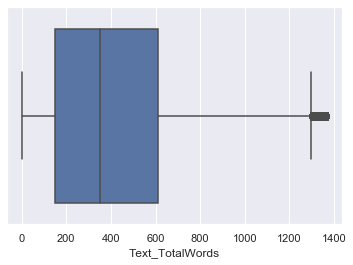

In [260]:
display_outliers_boxplot(df_all_news_processed, 'Text_TotalWords')

In [258]:


initial_size = len(df_all_news_processed)
print("----- Dataframe details before outliers removal: -----\n"+str(df_all_news_processed.describe())+"\n")
#display_outliers_boxplot(df_all_news_processed, 'Text_TotalWords')
print("Skewness value:")
EDA.display_outliers_skewness_value(df_all_news_processed, 'Text_TotalWords')

df_all_news_processed=EDA.remove_outliers_by_iqr_score(df_all_news_processed)

#display_outliers_boxplot(df_all_news_processed, 'Text_TotalWords')
print("\n----- Dataframe details after outliers removal: -----\n"+str(df_all_news_processed.describe())+"\n")
print("Skewness value:")
EDA.display_outliers_skewness_value(df_all_news_processed, 'Text_TotalWords')

total_loss=round((((len(df_all_news_processed)-initial_size)/initial_size)*100), 2)
print("\n----- Total loss: " + str(total_loss) +"% of the initial records -----")

----- Dataframe details before outliers removal: -----
       Text_TotalWords
count    324965.000000
mean        463.480261
std         514.936260
min           4.000000
25%         157.000000
50%         367.000000
75%         641.000000
max       64683.000000

Skewness value:
19.145407187627498

----- Dataframe details after outliers removal: -----
       Text_TotalWords
count    314770.000000
mean        410.190336
std         306.055646
min           4.000000
25%         151.000000
50%         353.000000
75%         609.000000
max        1367.000000

Skewness value:
0.7646688481841467

----- Total loss: -3.14% of the initial records -----


In [299]:
df_all_news_processed['clean_data'] = df_all_news_processed['clean_data'].apply(NLP.rejoin_words) 
df_all_news_processed.head(20)

/Users/filippos.pappas-cic.netherlandsibm.com/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Text,Category,Text_TotalWords,clean_data
0,Tracy Morgan performs first stand-up show since accident,"tracy morgan performs first stand-up show since accident tracy morgan is coming back with a bang. post to facebook tracy morgan performs first stand-up show since accident tracy morgan is coming back with a bang. check out this story on wtsp.com: http://on.wtsp.com/1rew1aj cancel send a link has been sent to your friend's email address. posted! a link has been posted to your facebook feed. join the conversation to find out more about facebook commenting please read the conversation guidelines and faqs tracy morgan performs first stand-up show since accident usa today, usatoday.com 9:02 a.m. edt october 13, 2015 actor tracy morgan arrives at the 67th annual primetime emmy awards governors ball at the los angeles convention center on september 20, 2015 in los angeles, california. ( kevin winter/getty images) more tracy morgan is coming back with a bang. the comedian, who has been recovering from a traumatic brain injury from a 2014 car accident for more than a year, is getting bac...",entertainment,380,"tracy morgan performs first stand-up show since accident tracy morgan coming back bang. post facebook tracy morgan performs first stand-up show since accident tracy morgan coming back bang. check story wtsp.com: http://on.wtsp.com/1rew1aj cancel send link sent friend's email address. posted! link posted facebook feed. join conversation find facebook commenting please read conversation guidelines faqs tracy morgan performs first stand-up show since accident usa today, usatoday.com 9:02 a.m. edt october 13, 2015 actor tracy morgan arrives 67th annual primetime emmy awards governors ball los angeles convention center september 20, 2015 los angeles, california. ( kevin winter/getty images) tracy morgan coming back bang. comedian, recovering traumatic brain injury 2014 car accident year, getting back swing things. returning stage memorable appearance emmy awards sept ., morgan now onstage perform. comedian will host saturday night live saturday, but, perhaps warm-up, stopped new york..."
1,President Barack Obama interviews author Marilynne Robinson,"fcc information president barack obama interviews author marilynne robinson (ap photo/susan walsh, file). file - in this oct. 8, 2015, file photo, president barack obama speaks at the congressional hispanic caucus institute s (chci) 38th anniversary awards gala in washington. hillary rodham clinton's use of a private email ser... new york (ap) - for this interview, president barack obama was the one asking the questions. in a discussion held last month in iowa and posted monday by the new york review of books, obama asked pulitzer prize-winning author marilynne robinson about faith, democracy, education and writing. obama explained that he met with robinson because he was anxious to have an unscripted discussion with someone he admired. ""one of the things that i don't get a chance to do as often as i'd like is just to have a conversation with somebody who i enjoy and i'm interested in,"" he told robinson, ""to hear from them and have a conversation with them about some of the broader...",entertainment,334,"fcc information president barack obama interviews author marilynne robinson (ap photo/susan walsh, file). file - oct. 8, 2015, file photo, president barack obama speaks congressional hispanic caucus institute s (chci) 38th anniversary awards gala washington. hillary rodham clinton's use private email ser... new york (ap) - interview, president barack obama one asking questions. discussion held last month iowa posted monday new york review books, obama asked pulitzer prize-winning author marilynne robinson faith, democracy, education writing. obama explained met robinson anxious unscripted discussion someone admired. ""one things get chance often like just conversation somebody enjoy interested in,"" told robinson, ""to hear conversation broader cultural forces shape democracy shap

In [34]:
test_travel = df_all_news_processed.loc[df_all_news_processed['Category'] == 'travel'][:5]
test_enter = df_all_news_processed.loc[df_all_news_processed['Category'] == 'entertainment'][:5]
test_world = df_all_news_processed.loc[df_all_news_processed['Category'] == 'world'][:5]

frames = [test_travel, test_enter, test_world]
result = pd.concat(frames)
result = result.reset_index(drop=True)
result

In [160]:
#test = df_all_news_processed[:100].copy()
test = df_all_news_processed.copy()
test

,Title,Text,Category,Text_TotalWords
0,Tracy Morgan performs first stand-up show since accident,"tracy morgan performs first stand-up show since accident tracy morgan is coming back with a bang. post to facebook tracy morgan performs first stand-up show since accident tracy morgan is coming back with a bang. check out this story on wtsp.com: http://on.wtsp.com/1rew1aj cancel send a link has been sent to your friend's email address. posted! a link has been posted to your facebook feed. join the conversation to find out more about facebook commenting please read the conversation guidelines and faqs tracy morgan performs first stand-up show since accident usa today, usatoday.com 9:02 a.m. edt october 13, 2015 actor tracy morgan arrives at the 67th annual primetime emmy awards governors ball at the los angeles convention center on september 20, 2015 in los angeles, california. (photo: kevin winter/getty images) connect tweet linkedin comment email more tracy morgan is coming back with a bang. the comedian, who has been recovering from a traumatic brain injury from a 2014 car accid...",entertainment,380
1,President Barack Obama interviews author Marilynne Robinson,"fcc information president barack obama interviews author marilynne robinson (ap photo/susan walsh, file). file - in this oct. 8, 2015, file photo, president barack obama speaks at the congressional hispanic caucus institute s (chci) 38th anniversary awards gala in washington. hillary rodham clinton's use of a private email ser... new york (ap) - for this interview, president barack obama was the one asking the questions. in a discussion held last month in iowa and posted monday by the new york review of books, obama asked pulitzer prize-winning author marilynne robinson about faith, democracy, education and writing. obama explained that he met with robinson because he was anxious to have an unscripted discussion with someone he admired. ""one of the things that i don't get a chance to do as often as i'd like is just to have a conversation with somebody who i enjoy and i'm interested in,"" he told robinson, ""to hear from them and have a conversation with them about some of the broader...",entertainment,334
2,"I will perform at night clubs, shows β€“ Pastor Ofori Amponsah","source: ghana | hitz fm | euphemia akpalu date: 12-10-2015 time: 02:10:52:pm ofori amponsah highlife-musician-turned-pastor, ofori amponsah, says he will perform at nightclubs and even at alcoholic company-sponsored events if contracted to. people don't actually know why i will do it, but i will do it and it's a secret i don't want to reveal, he told a fan. he added that, i cannot judge because there are no laws that forbid the sale of alcohol, i will perform but [i'll] not be a brand ambassador for alcoholic beverages. he said this while promoting his new single 'alewa' which features sarkodie. he officially announced his return to highlife music in an interview on hitz fm's showbiz fylla with amanda jissih. ofori amponsah went into hibernation in 2008 - after releasing his last major highlife song - to concentrate on god s work and to record gospel music. the musician, who recently announced his return to doing highlife music even though he is the head pastor of family of faith a...",entertainment,405
3,"MEG Records' Country Star Tom MacLear will be performing his Chart Topping Top 40 Country Single, Unapproachable, at the Sherman Oaks Street Fair","meg records : in latest music news , tom maclear's top 40 country singles , unapproachable, will be performed publicly at the sherman oaks street fair october 18th sherman oaks, ca (prweb) october 12, 2015 producer, singer, songwriter tom maclear (of meg records) is often referred to as the man behind the curtain, one of music s best kept secrets, is now emerging more toward the center of the stage as the driving force of tom maclear & friends an evergreen concept for his band that allows maclear to perform and make music with some of the best musicians a

Process completed.
Time taken:
2.28 seconds.


'\nbuzzwords bechmark on my MAC: 16 GB 1600 MHz DDR3 / 2,5 GHz Quad-Core Intel Core i7\n    / articles: 324.965 \n    / total number of words: 150.614.863 (with stopwords)\n    / process time: 2.631 seconds (around 44 minutes)\n'

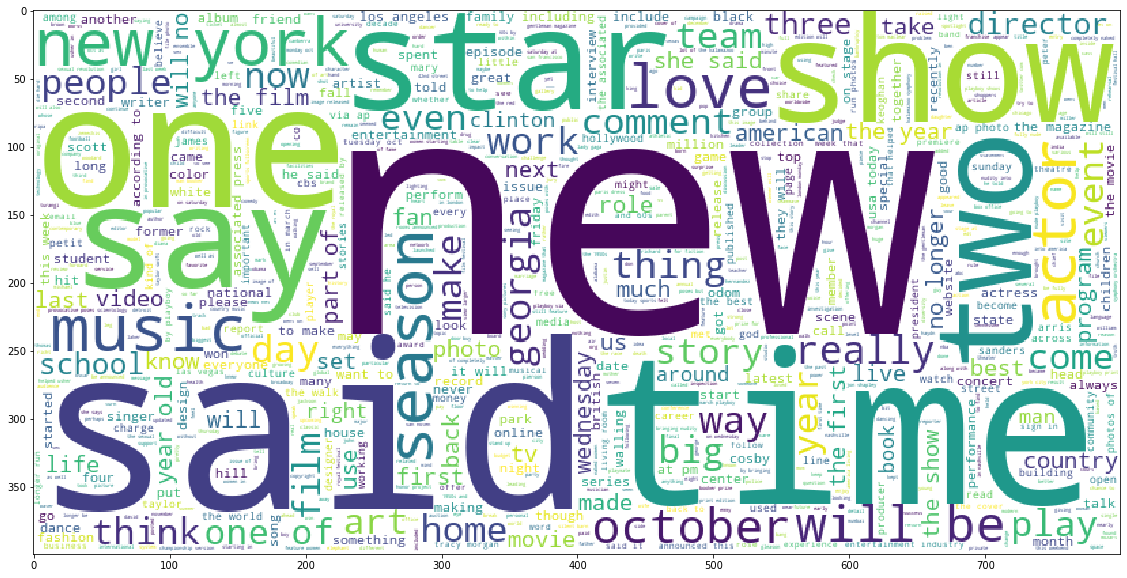

In [23]:
#test.replace(',',' ', regex=True, inplace=True)
#YOU NEED TO PASS THE DATA AS A LIST WITHOUT COMMA WITHIN THE TEXT.
EDA.display_buzzwords(list(df_all_news_processed['Text'].values))
'''
buzzwords bechmark on my MAC: 16 GB 1600 MHz DDR3 / 2,5 GHz Quad-Core Intel Core i7
    / articles: 324.965 
    / total number of words: 150.614.863 (with stopwords)
    / process time: 2.631 seconds (around 44 minutes)
'''

In [307]:
df_all_news_processed.head(2)

,Title,Text,Category,Text_TotalWords,clean_data
0,Tracy Morgan performs first stand-up show since accident,"tracy morgan performs first stand-up show since accident tracy morgan is coming back with a bang. post to facebook tracy morgan performs first stand-up show since accident tracy morgan is coming back with a bang. check out this story on wtsp.com: http://on.wtsp.com/1rew1aj cancel send a link has been sent to your friend's email address. posted! a link has been posted to your facebook feed. join the conversation to find out more about facebook commenting please read the conversation guidelines and faqs tracy morgan performs first stand-up show since accident usa today, usatoday.com 9:02 a.m. edt october 13, 2015 actor tracy morgan arrives at the 67th annual primetime emmy awards governors ball at the los angeles convention center on september 20, 2015 in los angeles, california. ( kevin winter/getty images) more tracy morgan is coming back with a bang. the comedian, who has been recovering from a traumatic brain injury from a 2014 car accident for more than a year, is getting back t...",entertainment,380,"tracy morgan performs first stand-up show since accident tracy morgan coming back bang. post facebook tracy morgan performs first stand-up show since accident tracy morgan coming back bang. check story wtsp.com: http://on.wtsp.com/1rew1aj cancel send link sent friend's email address. posted! link posted facebook feed. join conversation find facebook commenting please read conversation guidelines faqs tracy morgan performs first stand-up show since accident usa today, usatoday.com 9:02 a.m. edt october 13, 2015 actor tracy morgan arrives 67th annual primetime emmy awards governors ball los angeles convention center september 20, 2015 los angeles, california. ( kevin winter/getty images) tracy morgan coming back bang. comedian, recovering traumatic brain injury 2014 car accident year, getting back swing things. returning stage memorable appearance emmy awards sept ., morgan now onstage perform. comedian will host saturday night live saturday, but, perhaps warm-up, stopped new york..."
1,President Barack Obama interviews author Marilynne Robinson,"fcc information president barack obama interviews author marilynne robinson (ap photo/susan walsh, file). file - in this oct. 8, 2015, file photo, president barack obama speaks at the congressional hispanic caucus institute s (chci) 38th anniversary awards gala in washington. hillary rodham clinton's use of a private email ser... new york (ap) - for this interview, president barack obama was the one asking the questions. in a discussion held last month in iowa and posted monday by the new york review of books, obama asked pulitzer prize-winning author marilynne robinson about faith, democracy, education and writing. obama explained that he met with robinson because he was anxious to have an unscripted discussion with someone he admired. ""one of the things that i don't get a chance to do as often as i'd like is just to have a conversation with somebody who i enjoy and i'm interested in,"" he told robinson, ""to hear from them and have a conversation with them about some of the broader...",entertainment,334,"fcc information president barack obama interviews author marilynne robinson (ap photo/susan walsh, file). file - oct. 8, 2015, file photo, president barack obama speaks congressional hispanic caucus institute s (chci) 38th anniversary awards gala washington. hillary rodham clinton's use private email ser... new york (ap) - interview, president barack obama one asking questions. discussion held last month iowa posted monday new york review books, obama asked pulitzer prize-winning author marilynne robinson faith, democracy, education writing. obama explained met robinson anxious unscripted discussion someone admired. ""one things get chance often like just conversation somebody enjoy interested in,"" told robinson, ""to hear conversation broader cultural forces shape democracy s

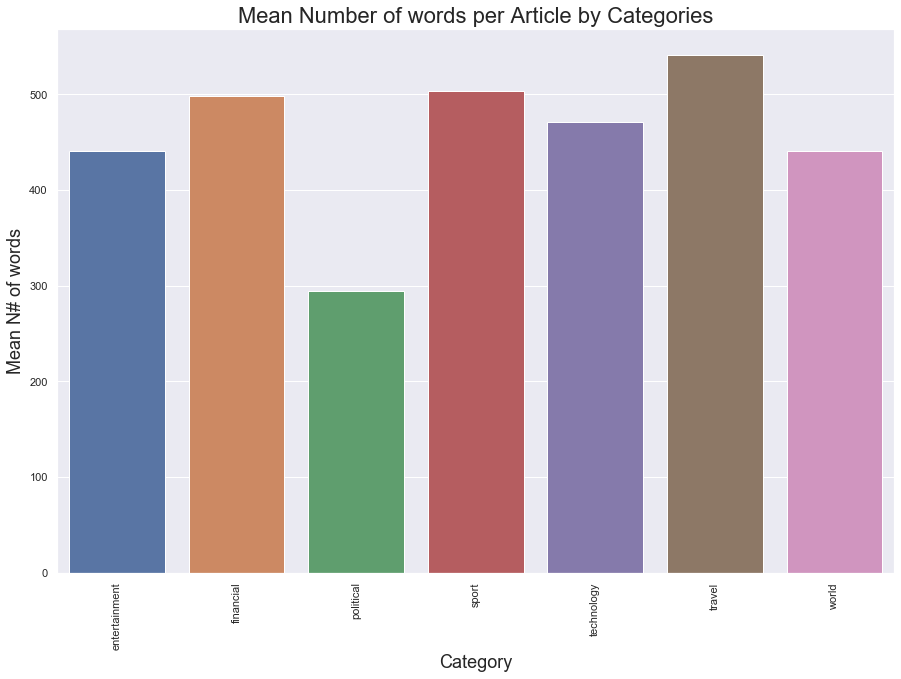

In [146]:
#df_all_news_processed.groupby(['Category']).mean()
asdf = df_all_news_processed.groupby('Category')['Text_TotalWords'].mean()
EDA.display_distribution(asdf
                        ,"Mean Number of words per Article by Categories"
                        ,"Categories"
                        ,"Mean N# of words")

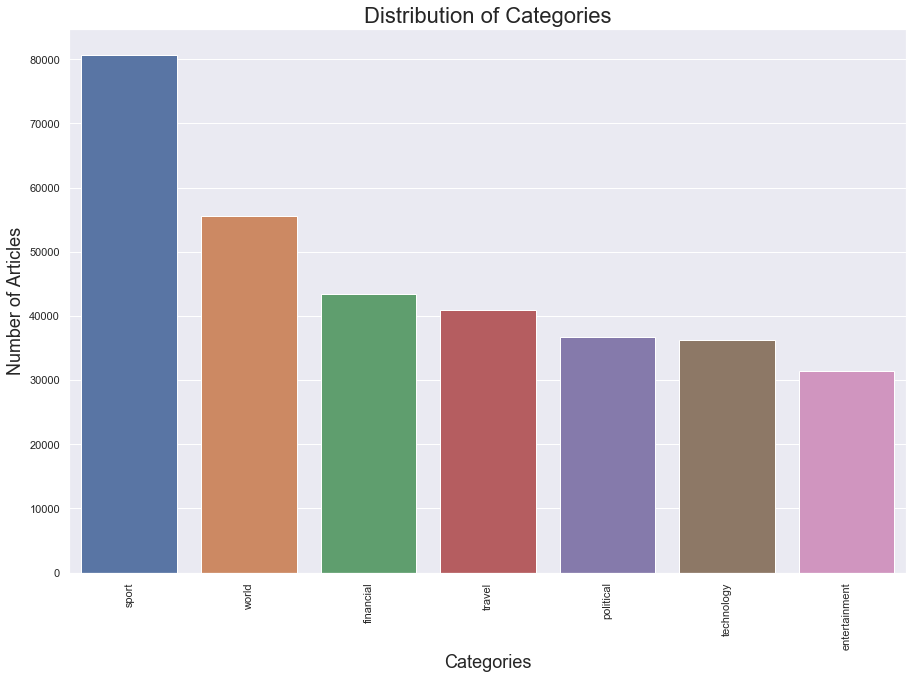

In [139]:
categories_count = df_all_news_processed['Category'].value_counts()
EDA.display_distribution(categories_count
                        ,"Distribution of Categories"
                        ,"Categories"
                        ,"Number of Articles")

In [2]:
df_all_news_processed

NameError: name 'df_all_news_processed' is not defined

In [5]:
''''''''''''''''''' ___MAIN PIPELINE___ '''''''''''''''''''

df_all_news = pd.read_pickle(r'data/original_data/pickles/all_news')

### Cleaning part
df_all_news['Text_TotalWords'] = EDA.count_words_per_records_opt_2(df_all_news)

df_all_news.reset_index(drop=True, inplace=True)

df_all_news_processed = df_all_news.copy()
#remove outliers - first phase
df_all_news_processed = df_all_news_processed[df_all_news_processed['Text_TotalWords'] > 10] 
df_all_news_processed = df_all_news_processed[df_all_news_processed['Text_TotalWords'] < 3000] 

df_all_news_processed = Cleaner.drop_duplicate_values(df_all_news_processed)
df_all_news_processed = Cleaner.remove_new_line(df_all_news_processed)
df_all_news_processed = Cleaner.remove_non_ascii_chars(df_all_news_processed)
df_all_news_processed = Cleaner.remove_multiple_spaces(df_all_news_processed)
df_all_news_processed = Cleaner.drop_null_values(df_all_news_processed)
df_all_news_processed = Cleaner.drop_duplicate_values(df_all_news_processed)

In [6]:
df_all_news_processed

,Title,Text,Category,Text_TotalWords
1,Tracy Morgan performs first stand-up show sinc...,Tracy Morgan performs first stand-up show sinc...,entertainment,380
3,President Barack Obama interviews author Maril...,FCC Information President Barack Obama intervi...,entertainment,333
4,"I will perform at night clubs, shows β€“ Pasto...",Source: Ghana | Hitz FM | Euphemia Akpalu Date...,entertainment,404
7,MEG Records' Country Star Tom MacLear will be ...,"MEG Records : In Latest Music News , Tom MacLe...",entertainment,326
8,Defeat the Zombie Apocalypse,Defeat the Zombie Apocalypse Zombie hunting in...,entertainment,36
...,...,...,...,...
493427,Bidenβ€™s Indecision Fuels Doubts He Could Sti...,Vice President Joe Biden s summer of uncertain...,world,749
493428,AFL grand final 2015: Hawthorn drop Billy Hart...,Return to video Video settings Please Log in t...,world,635
493429,Joaquin lashes Bahamas; Powerful hurricane cou...,"Photo: Tim Aylen, AP Image 1 of / 5 Caption Cl...",world,1226
493430,5 US service members among 12 dead in Afghan p...,5 US service members among 12 dead in Afghan p...,world,144


In [ ]:
#N-grams function (done)
#buzzwords function (done)
#sentence encoder (too large texts to visaulise interactively)


df_all_news_processed['Text'] = NLP.to_lower_case(df_all_news_processed, 'Text')
df_all_news_processed = Cleaner.remove_most_noisy_words(df_all_news_processed, 'noisy_words.txt')
df_all_news_processed = Cleaner.remove_multiple_spaces(df_all_news_processed)

In [ ]:
articles_split_by_word = NLP.tokenization(df_all_news_processed)
df_all_news_processed['Text'] = articles_split_by_word.apply(NLP.remove_stop_words)
df_all_news_processed['Text'] = df_all_news_processed['Text'].apply(NLP.rejoin_words) 
print("reached here")
df_all_news_processed = Cleaner.remove_punctuation(df_all_news_processed)
df_all_news_processed = Cleaner.remove_single_chars(df_all_news_processed)
df_all_news_processed = Cleaner.remove_multiple_spaces(df_all_news_processed)
#CHECKPOINT: Print N-grams

In [ ]:
df_all_news_processed

In [ ]:
df_all_news_processed = Cleaner.remove_links(df_all_news_processed)
df_all_news_processed = Cleaner.remove_dates(df_all_news_processed)
df_all_news_processed = Cleaner.remove_years(df_all_news_processed)
df_all_news_processed = Cleaner.remove_months(df_all_news_processed)
df_all_news_processed = Cleaner.remove_days(df_all_news_processed)
df_all_news_processed = Cleaner.remove_time(df_all_news_processed)
df_all_news_processed = Cleaner.remove_multiple_spaces(df_all_news_processed)
#CHECKPOINT: Print N-grams

In [ ]:
#lemmatize (if applicable)
#remove outliers
df_all_news['Text_TotalWords'] = EDA.count_words_per_records_opt_2(df_all_news_processed)
df_all_news_processed = df_all_news_processed[df_all_news_processed['Text_TotalWords'] > 10]

#N-grams function (done)
#buzzwords function (done)

########## Feature Engineering & Data Modelling ##########
#normalize, tf-idf vectors


In [ ]:
'''######################## Find N-Grams ########################
from collections import Counter
from itertools import chain

#This function is called from find_most_common_n_grams()
def find_ngrams(input_list, n, n_common_words):
    return list(zip(*[input_list[i:] for i in range(n)]))


########### [Input] ###########
########## df: The DataFrame with the data that would like to process
########## n: The number of N-grams 
########## n_top_ngrams: The number the X most common N-grams
########## Returns: A list with the X most common N-grams and their occurrences 
def find_most_common_n_grams(df, n, n_top_ngrams):
    
    n_grams_title = str(n) +'_grams'
    
    df[n_grams_title] = df['Text'].map(lambda x: find_ngrams(x.split(" "), n, 10))
    
    ngrams = df[n_grams_title].tolist()
    ngrams = list(chain(*ngrams))

    #TODO this: should have x,y,z as the n increases 
    # e.g. [(x.lower(), y.lower(), z.lower()) for x,y,z in ngrams] #--> For 3-grams etc.
    #ngrams = [(x.lower(), y.lower()) for x,y in ngrams]

    ngram_counts = Counter(ngrams)
    return ngram_counts.most_common(n_top_ngrams)

#4 stands for: fourgrams. Change to any n value
#20 stands for: display the top 20 n-grams
testing = find_most_common_n_grams(df_all_news_processed, 4, 20)'''

In [ ]:
'''''''''''''''''''' -----NOT USED------''''''''''''''''''''''''''

#THIS CANNOT BE DONE BECAUSE WE DONT WANT TO REPLACE THE OUTLIERS WITH THE MEAN VALUE
#BECAUSE OF THE HIGH NUMBERS OF THE OUTLIERS, WE WANT TO REMOVE THEM COMPLETELY.
#PLUS THIS IS ABOUT NUMBER OF WORDS PER ARTICLE. WE CANT REPLACE ARTICLES WITH OTHER ARTICLES
#BECUASE THAT WOULD MESS UP OUR DATASET.
def remove_outliers_quantile_percentages(df, column_name, low_percent, high_percent):
    low_value = df[column_name].quantile(low_percent)
    high_value = df[column_name].quantile(high_percent)
    df[column_name] = np.where(df[column_name] <low_value, low_value,df[column_name])
    df[column_name] = np.where(df[column_name] >high_value, high_value,df[column_name])
    return df[column_name]
    
display_outliers_skewness_value(test, 'Text_TotalWords')
test['Text_TotalWords'] = remove_outliers_quantile_percentages(test, 'Text_TotalWords', 0.10, 0.90)
display_outliers_skewness_value(test, 'Text_TotalWords')
'''''''''''''''''''' -----NOT USED------''''''''''''''''''''''''''

In [341]:
######## SERIAL CLEANING STEPS ######
Remove new line
Remove non-ascii chars
Remove multiple spaces
Remove null values
Remove duplicate values
Remove noisy pre-defined words (by list) / n-grams (to-do)
Remove punctuations
to lower(NLP)
Remove single chars
Remove links
Remove years
Remove months (to do)
Remove days
Remove time
Remove multiple spaces
Remove stopwords(NLP)

Remove outliers(EDA)

'\n0) replace \n with space\n1) split the words and find the most frequently words. Decide if they are part of the article or not\nand then eliminate them in order to reduce the noise. To do that put them in a list with wordsToDeleteArray\n\n2) for sure delete \'Updated: 12:30 a.m.\'\' or similar time  / \'Photo: \'?\n3) (After) regex to remove the times such as 15:20 a.m.\n4) We may keep: the numbers because of the sports category\n5) replace the selected symbols with space\n6) remove multiple spaces\n7) remove stopwords\n8) remove chars that are single such as "s"/. If you replace the symbol "That\'s" then it\'s left "That s"\n'